In [10]:
#pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
#pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Packages

In [124]:
#Reading data
import pandas as pd

# Data source
import kagglehub

#For mathematical operations
import numpy as np

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
import seaborn as sns

In [ ]:
# Download latest version
path = kagglehub.dataset_download("rivalytics/healthcare-workforce-mental-health-dataset")

print("Path to dataset files:", path)

# Sleep Health Analysis

In [63]:
raw_df = pd.read_csv('dataset/Sleep_health_and_lifestyle_dataset.csv') 
sleep_df = pd.DataFrame(raw_df)

## Key Features of the Dataset:
- Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
- Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
- Cardiovascular Health: Examine blood pressure and heart rate measurements.
- Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

### Details about Sleep Disorder Column:

    None: The individual does not exhibit any specific sleep disorder.
    Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
    Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.


In [65]:
print(sleep_df)

     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

In [67]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [69]:
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [34]:
len(sleep_df)

374

In [71]:
print(sleep_df.isnull().sum())

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [73]:
sleep_df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [75]:
disorder_df_false = sleep_df[sleep_df['Sleep Disorder'].isnull()]

In [77]:
disorder_df_false

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,342,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,NaN
342,343,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,NaN
343,344,Female,57,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,NaN
358,359,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,NaN


In [98]:
# Filtrar apenas as linhas onde 'Sleep Disorder' não é nulo
df_disorder = sleep_df[sleep_df['Sleep Disorder'].notnull()]

In [100]:
df_disorder

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
16,17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# Grouping 

Sleep disorder x age
disorder x genero 
agrupar quantas pessoas agrupadas por profissão 

## Média de Idade por Distúrbio de Sono

In [140]:
grouped_data = df_disorder.groupby('Sleep Disorder')['Age'].mean().reset_index()
grouped_data

,Sleep Disorder,Age
0,Insomnia,43.519481
1,Sleep Apnea,49.705128


## Distúbio do Sono por Gênero

In [132]:
count_by_gender_disorder = df_disorder.groupby(['Gender', 'Sleep Disorder']).size().reset_index(name='Amount')
count_by_gender_disorder

,Gender,Sleep Disorder,Amount
0,Female,Insomnia,36
1,Female,Sleep Apnea,67
2,Male,Insomnia,41
3,Male,Sleep Apnea,11


In [146]:
# Agrupar por 'Occupation' e contar o número de ocorrências
count_by_occupation = df_disorder.groupby('Occupation').size().reset_index(name='Amount of Person')
count_by_occupation

,Occupation,Amount of Person
0,Accountant,7
1,Doctor,7
2,Engineer,6
3,Lawyer,5
4,Nurse,64
5,Sales Representative,2
6,Salesperson,30
7,Scientist,2
8,Software Engineer,1
9,Teacher,31


# Visualização de dados

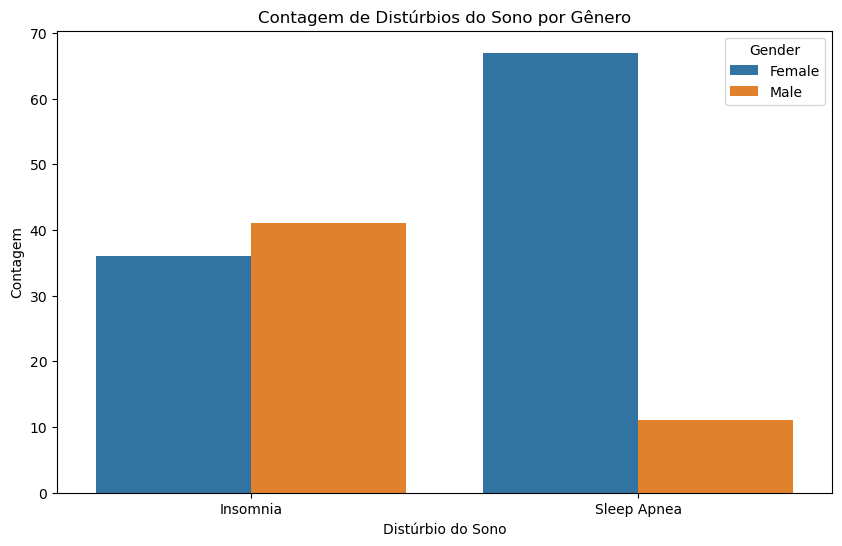

In [136]:
# Visualizar os dados agrupados usando seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Sleep Disorder', y='Amount', hue='Gender', data=count_by_gender_disorder)
plt.title('Contagem de Distúrbios do Sono por Gênero')
plt.xlabel('Distúrbio do Sono')
plt.ylabel('Contagem')
plt.show()

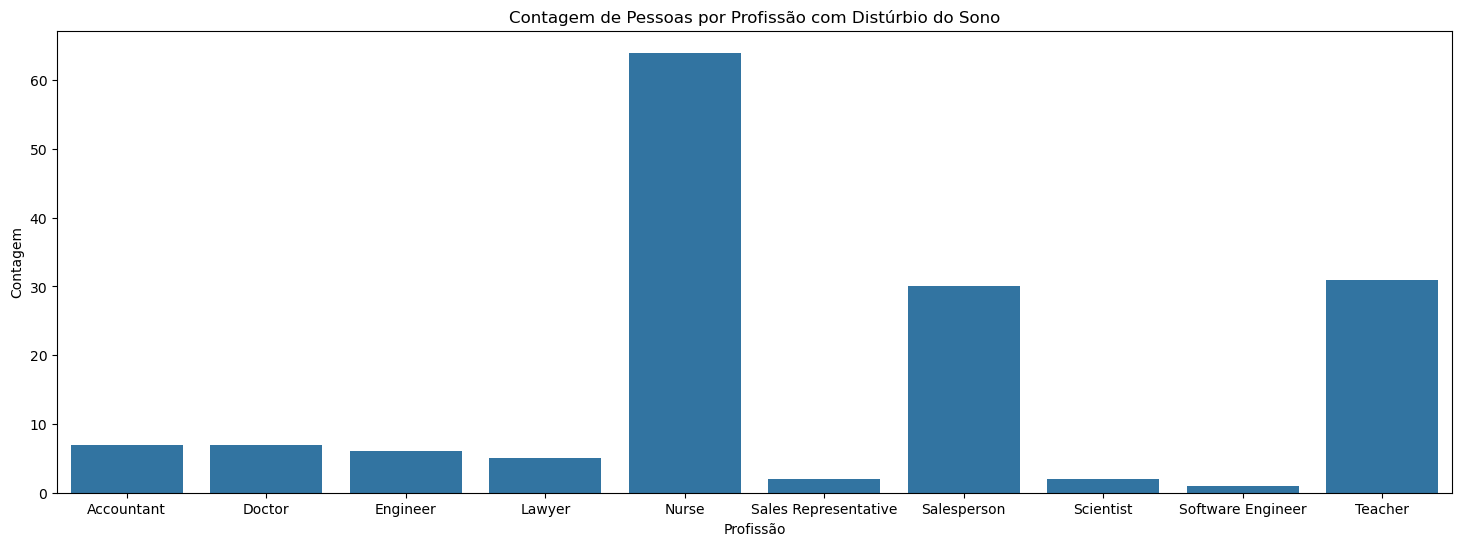

In [154]:
# Agrupar por 'Occupation' e contar o número de ocorrências
count_by_occupation = df_disorder.groupby('Occupation').size().reset_index(name='Count')

# Visualizar os dados agrupados usando seaborn
plt.figure(figsize=(18, 6))
sns.barplot(x='Occupation', y='Count', data=count_by_occupation)
plt.title('Contagem de Pessoas por Profissão com Distúrbio do Sono')
plt.xlabel('Profissão')
plt.ylabel('Contagem')
plt.show()